## Importar paquetes de preprocesamiento

In [2]:
import numpy as np
import pandas as pd
import re 
import nltk
import warnings
import os
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.stem.porter import PorterStemmer
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lectura DF

In [3]:
path = os.getcwd()
full_df = pd.read_csv(f'{path}/Questions.csv', encoding='latin1')

In [4]:
#creamos cluster con 1 millon para tener las mismas condiciones en el clasificador para asi tener base oot
full_df.head()
full_df = full_df[:1000000]

In [5]:
print(f'full: {len(full_df)}, text: {len(df)}')

NameError: name 'df' is not defined

## Se eliminan columnas que no sirven para el analisis

In [6]:
full_df['text'] = full_df['Title'].astype(str)
df = full_df.drop(['Body','Title','ClosedDate'], axis=1)
df = df.reset_index(drop=True)

In [22]:
full_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,text
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Good branching and merging tutorials for Torto...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,ASP.NET Site Maps
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,Function for creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,Adding scripting functionality to .NET applica...


#### Funciones auxiliares

In [8]:
def remove_punc(text):
    return text.translate(str.maketrans('','',punc_to_remove))
def remove_stopwords(text, stpwords):
    return ' '.join([word for word in str(text).split() if word not in stpwords])
def remove_freqwords(text):
    return ' '.join([word for word in str(text).split() if word not in freqwords])
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
def remove_numbers(text):
    return re.sub(r"\d+", "", text)
def remove_account(text):
    return re.sub(r"@\w+", "", text)

## Preprocesamiento

#### Minuscula

In [9]:
df['text_lower'] = df['text'].str.lower()
df.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...


#### Remover puntuación

In [10]:
punc_to_remove= string.punctuation.replace('.','')
df['punc_remove']=df['text_lower'].apply(remove_punc)
df.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...


#### Remover stopwords

In [11]:
stpwords= set(stopwords.words('english'))
df['stopwords_remove']= df['punc_remove'].apply(lambda text: remove_stopwords(text,stpwords))
df.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove,stopwords_remove
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...,sqlstatement.execute multiple queries one stat...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...,good branching merging tutorials tortoisesvn
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps,asp.net site maps
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels,function creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...,adding scripting functionality .net applications


#### Remover freq words

In [12]:
ct= Counter()

for t in df['stopwords_remove'].values:
   for w in t.split():
        ct[w] +=1

freqwords = set([w for (w, wc) in ct.most_common(10)])
df['freq_word_remove']= df['stopwords_remove'].apply(remove_freqwords)
df.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove,stopwords_remove,freq_word_remove
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple queries one stat...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...,good branching merging tutorials tortoisesvn,good branching merging tutorials tortoisesvn
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site maps
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels,function creating color wheels,function creating color wheels
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...,adding scripting functionality .net applications,adding scripting functionality .net applications


In [13]:
lemmatizer= WordNetLemmatizer()
df['text_lemmatize']= df['freq_word_remove'].apply(lemmatize_words)
df.head(-1)

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove,stopwords_remove,freq_word_remove,text_lemmatize
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple query one statement
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...,good branching merging tutorials tortoisesvn,good branching merging tutorials tortoisesvn,good branching merging tutorial tortoisesvn
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site map
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels,function creating color wheels,function creating color wheels,function creating color wheel
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...,adding scripting functionality .net applications,adding scripting functionality .net applications,adding scripting functionality .net application
...,...,...,...,...,...,...,...,...,...,...
999994,33112560,1219968.0,2015-10-13T21:02:04Z,2,Why is a thread blocking my JavaFX UI Thread?,why is a thread blocking my javafx ui thread?,why is a thread blocking my javafx ui thread,thread blocking javafx ui thread,thread blocking javafx ui thread,thread blocking javafx ui thread
999995,33112570,5427938.0,2015-10-13T21:02:41Z,2,GStreamer tutorial on Android getting 'Unsuppo...,gstreamer tutorial on android getting 'unsuppo...,gstreamer tutorial on android getting unsuppor...,gstreamer tutorial android getting unsupported...,gstreamer tutorial getting unsupported profile...,gstreamer tutorial getting unsupported profile...
999996,33112630,5442641.0,2015-10-13T21:06:46Z,-2,I am getting an undefined index error,i am getting an undefined index error,i am getting an undefined index error,getting undefined index error,getting undefined index,getting undefined index
999997,33112660,1754127.0,2015-10-13T21:08:36Z,0,Bootstrapping to estimate the mean of a geomet...,bootstrapping to estimate the mean of a geomet...,bootstrapping to estimate the mean of a geomet...,bootstrapping estimate mean geometric sample,bootstrapping estimate mean geometric sample,bootstrapping estimate mean geometric sample


In [14]:
df['text_without_number']= df['text_lemmatize'].apply(remove_numbers)
df['text_without_acc']= df['text_without_number'].apply(remove_account)
df.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove,stopwords_remove,freq_word_remove,text_lemmatize,text_without_number,text_without_acc
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple query one statement,sqlstatement.execute multiple query one statement,sqlstatement.execute multiple query one statement
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...,good branching merging tutorials tortoisesvn,good branching merging tutorials tortoisesvn,good branching merging tutorial tortoisesvn,good branching merging tutorial tortoisesvn,good branching merging tutorial tortoisesvn
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site map,asp.net site map,asp.net site map
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels,function creating color wheels,function creating color wheels,function creating color wheel,function creating color wheel,function creating color wheel
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...,adding scripting functionality .net applications,adding scripting functionality .net applications,adding scripting functionality .net application,adding scripting functionality .net application,adding scripting functionality .net application


In [15]:
permitidos = r'^[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s¡!¿?,.;:()\'"-]+$'
mask = df['text_without_acc'].str.match(permitidos)
df_filtrado = df[mask].copy()

In [16]:
df_filtrado['text_clean'] = df_filtrado['text_without_acc'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_filtrado = df_filtrado[df_filtrado['text_clean'].str.len() > 0]
df_filtrado = df_filtrado[df_filtrado['text_clean'].str.split().apply(len) >= 3]
df_filtrado.head()

,Id,OwnerUserId,CreationDate,Score,text,text_lower,punc_remove,stopwords_remove,freq_word_remove,text_lemmatize,text_without_number,text_without_acc,text_clean
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,sqlstatement.execute() - multiple queries in o...,sqlstatement.execute multiple queries in one ...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple queries one stat...,sqlstatement.execute multiple query one statement,sqlstatement.execute multiple query one statement,sqlstatement.execute multiple query one statement,sqlstatement.execute multiple query one statement
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,good branching and merging tutorials for torto...,good branching and merging tutorials for torto...,good branching merging tutorials tortoisesvn,good branching merging tutorials tortoisesvn,good branching merging tutorial tortoisesvn,good branching merging tutorial tortoisesvn,good branching merging tutorial tortoisesvn,good branching merging tutorial tortoisesvn
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site maps,asp.net site map,asp.net site map,asp.net site map,asp.net site map
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,function for creating color wheels,function for creating color wheels,function creating color wheels,function creating color wheels,function creating color wheel,function creating color wheel,function creating color wheel,function creating color wheel
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,adding scripting functionality to .net applica...,adding scripting functionality to .net applica...,adding scripting functionality .net applications,adding scripting functionality .net applications,adding scripting functionality .net application,adding scripting functionality .net application,adding scripting functionality .net application,adding scripting functionality .net application


## Vectorizar (Metodo TF-IDF)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=60, ngram_range=(1,3))
X_tfidf = vectorizer.fit_transform(df_filtrado["text_clean"])

In [19]:
len(vectorizer.vocabulary_)

10432

In [20]:
#pkl del vectorizador
import joblib
joblib.dump(vectorizer, 'vectorizer_tfidf.pkl')

['vectorizer_tfidf.pkl']

## Modelo de clustering

In [102]:
import matplotlib.pyplot as plt #gráfica
from sklearn.cluster import KMeans
from sklearn import metrics

#### Metodo del codo para encontrar la cantidad de cluster ideal

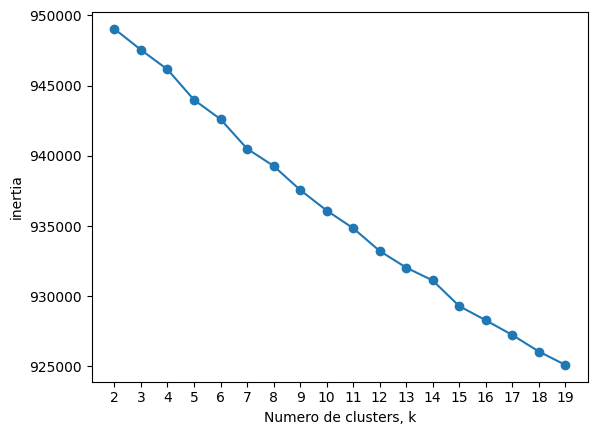

In [39]:
ks = range(2, 20) # crear valores del 2 al 20
inertias = []
 
for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300,random_state=30)
    model.fit(X_tfidf)
    inertias.append(model.inertia_)
 
# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Crear clusters

In [63]:
k=15
model = KMeans(n_clusters=k, max_iter=300,random_state=30)
labels = model.fit(X_tfidf) # datos

In [ ]:
#Silueta: se requiere que sea positivo, ideal 0.5-1.0
sil=metrics.silhouette_score(X_tfidf, model.labels_)
print('Silueta:',sil)

In [54]:
df_filtrado['label'] = model.labels_
full_df = full_df[['Id','OwnerUserId','CreationDate','Score','text']]
df_filtrado = df_filtrado[['Id','OwnerUserId','CreationDate','Score','label']]	
df_entrenamiento = pd.merge(full_df, df_filtrado, on=['Id','OwnerUserId','CreationDate','Score'], how='inner')

In [46]:
df_entrenamiento.head()

,Id,OwnerUserId,CreationDate,Score,text,label
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,8
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,6
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,6
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,6
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,6


In [55]:
print(df_entrenamiento['label'].value_counts().sort_index())

label
0       1115
1      40601
2      17888
3      36850
4      17129
5      35550
6     677425
7      15203
8      24101
9      16746
10     12738
11     13702
12     18240
13      8759
14     17392
Name: count, dtype: int64


In [56]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names[20:50])

['accept' 'acceptable' 'accepted' 'accepting' 'accepts' 'acces' 'access'
 'access array' 'access class' 'access control' 'access database'
 'access db' 'access denied' 'access element' 'access file' 'access form'
 'access google' 'access method' 'access object' 'access parent'
 'access private' 'access property' 'access query' 'access sql'
 'access table' 'access token' 'access value' 'access variable'
 'access vba' 'access violation']


In [57]:
for i in range(k):
    print(f"\nCluster {i}:")
    print(df_entrenamiento[df_entrenamiento['label'] == i]['text'].head(20).to_string(index=False))


Cluster 0:
Which annotation should I use: @IdClass or @Emb...
              Scanning Java annotations at runtime
           Hibernate Annotation Placement Question
auto-detecting components using spring annotations
Cannot locate 'org.springframework.security.ann...
Should I make a constants class for my annotati...
              Can Java annotations be unit tested?
                         XML serialize annotations
Do you use (or define) non standard annotations...
                    Annotation support in Struts 2
How can I insert a record in join table of a ma...
A technology for reading pdfs online with annot...
How to Integrate LinqToSql with Metadata Annota...
why grails uses "static" vars instead of annota...
SpringAOP-generated Dynamic subclass is missing...
Is there a way to get the javadoc tool to docum...
                     Spring 2 Hibernate Annotation
Adding annotations to MKMapView in specific lay...
                         javax annotations problem
Positioning MKMapVi

In [59]:
cluster_resumen = {
    0: "Uso de anotaciones en Java, Spring, Hibernate, Struts y serializacion; tambien incluye anotaciones en plataformas moviles como MKMapView.",
    1: "Problemas y valores por defecto en propiedades, debugging en Visual Studio, issues con jQuery, AJAX y almacenamiento de valores.",
    2: "Interaccion con paginas web: flujo de paginas, autorizacion, cache, multiples formularios y manejo de POST en distintas tecnologias.",
    3: "Consultas SQL, HTML, manejo de tablas y normalizacion; incluye manipulacion de DOM y diferencias entre tablas y CSS.",
    4: "Listas en programacion: manipulacion, agrupacion, delegados, estructuras en SharePoint y frameworks como Scala y Python.",
    5: "Operaciones con strings, performance en concatenacion, parsing, analisis de codigo, errores de base de datos, e integracion de frameworks.",
    6: "Temas generales de desarrollo: branching, scripting, unit testing, consumo de servicios, configuracion de proyectos y triggers.",
    7: "Bases de datos: conexion, estructura, testing, engines, ACL en CakePHP, denormalizacion y patrones de diseno de acceso.",
    8: "Consultas SQL en MySQL y errores comunes: replicacion, triggers, stored procedures, logs binarios y sugerencias de autocompletado.",
    9: "Metodos y funciones: extension, reflexion, paso de parametros, testing, seguridad, diseno orientado a objetos y metaprogramacion.",
    10: "Como 'hacer que algo funcione': URLs amigables, CSS, visual studio, controles personalizados, git, SOAP, Flex y accesibilidad.",
    11: "Preguntas sobre 'como funciona' algo: statements preparados, QA, CSS, validacion W3C, threading, SOA, omnicomplete y Scrum.",
    12: "Problemas de manejar multiples entidades: conexiones, versiones, tablas, lenguajes, servidores, layouts, colecciones y parches.",
    13: "Paso de parametros en multiples lenguajes y entornos: SQL, C, C++, Java, Ruby, Oracle, jQuery, funciones y referencias.",
    14: "Errores de 'no funciona': debugging, __doPostBack, CSS, eventos en jQuery, atributos, visualizacion, Mercurial y fechas."
}


In [60]:
df_entrenamiento['descripcion_cluster'] = df_entrenamiento['label'].map(cluster_resumen)

In [61]:
df_entrenamiento.head(60)

,Id,OwnerUserId,CreationDate,Score,text,label,descripcion_cluster
0,80,26.0,2008-08-01T13:57:07Z,26,SQLStatement.execute() - multiple queries in o...,12,Problemas de manejar multiples entidades: cone...
1,90,58.0,2008-08-01T14:41:24Z,144,Good branching and merging tutorials for Torto...,6,"Temas generales de desarrollo: branching, scri..."
2,120,83.0,2008-08-01T15:50:08Z,21,ASP.NET Site Maps,6,"Temas generales de desarrollo: branching, scri..."
3,180,2089740.0,2008-08-01T18:42:19Z,53,Function for creating color wheels,6,"Temas generales de desarrollo: branching, scri..."
4,260,91.0,2008-08-01T23:22:08Z,49,Adding scripting functionality to .NET applica...,6,"Temas generales de desarrollo: branching, scri..."
5,330,63.0,2008-08-02T02:51:36Z,29,Should I use nested classes in this case?,6,"Temas generales de desarrollo: branching, scri..."
6,470,71.0,2008-08-02T15:11:47Z,13,Homegrown consumption of web services,6,"Temas generales de desarrollo: branching, scri..."
7,580,91.0,2008-08-02T23:30:59Z,21,Deploying SQL Server Databases from Test to Live,7,"Bases de datos: conexion, estructura, testing,..."
8,650,143.0,2008-08-03T11:12:52Z,79,Automatically update version number,6,"Temas generales de desarrollo: branching, scri..."
9,810,233.0,2008-08-03T20:35:01Z,9,Visual Studio Setup Project - Per User Registr...,6,"Temas generales de desarrollo: branching, scri..."


In [62]:
df_entrenamiento.to_csv('df_entrenamiento_cluster.csv', sep=',')